# Initial attempt to use time series exploration and ARIMA modeling.

In [97]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

from os import listdir
from os.path import isfile, join

In [6]:
# All the file names if we needed to access all the stocks at once
files = [f for f in listdir("data/Stocks") if isfile(join("data/Stocks", f))]

In [11]:
#we can look at any stock by putting the file name here
stock = "IBM.us.txt"

In [12]:
df1 = pd.read_csv(f"./data/Stocks/{stock}")

In [15]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [18]:
df1.set_index('Date',inplace=True)

In [19]:
df1.sort_index(inplace=True)

In [30]:
df1.resample('W').mean().head(1)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1962-01-07,6.36705,6.381675,6.300225,6.316925,392956.75,0.0


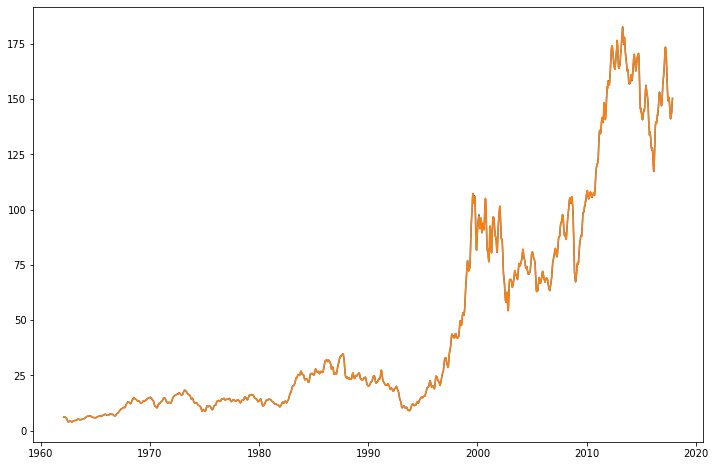

In [32]:
plt.figure(figsize=(12,8))
#plt.plot(df1['Open'])
plt.plot(df1['Open'].rolling(30).mean())
plt.plot(df1['Close'].rolling(30).mean())

In [33]:
df1['2000']

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2000-01-03,93.568,96.497,93.113,96.497,12392245,0
2000-01-04,94.878,95.295,92.266,93.278,9853487,0
2000-01-05,93.989,99.630,93.315,96.497,15249083,0
2000-01-06,98.161,98.941,94.461,94.878,9547026,0
2000-01-07,97.544,98.122,92.073,94.461,14199403,0
...,...,...,...,...,...,...
2000-12-22,70.457,74.527,70.457,74.216,11393820,0
2000-12-26,74.216,74.685,70.241,70.718,7248141,0
2000-12-27,70.658,73.483,69.672,70.610,9874202,0


In [34]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

In [61]:
years = [df1['2000'],df1['2001'],df1['2002'],df1['2003'],
         df1['2004'],df1['2005'],df1['2006'],df1['2007'],
         df1['2008'],df1['2009'],df1['2010'],df1['2011'],
         df1['2012'],df1['2013'],df1['2014'],df1['2015'],
         df1['2016'],df1['2017']]

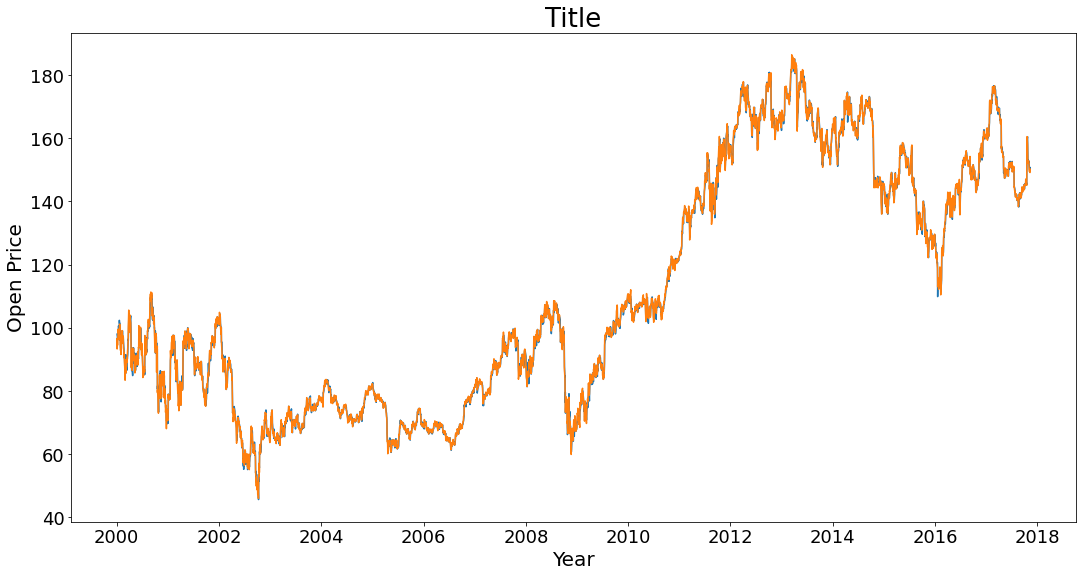

In [63]:
plot_series(pd.concat(years),cols=['Open','Close'],
           xlab="Year", ylab = 'Open Price')

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2000-01-03,93.568,96.497,93.113,96.497,12392245,0
2000-01-04,94.878,95.295,92.266,93.278,9853487,0
2000-01-05,93.989,99.630,93.315,96.497,15249083,0
2000-01-06,98.161,98.941,94.461,94.878,9547026,0
2000-01-07,97.544,98.122,92.073,94.461,14199403,0
...,...,...,...,...,...,...
2001-12-24,101.900,102.290,101.140,101.400,1981283,0
2001-12-26,101.850,103.300,101.700,102.220,4617526,0
2001-12-27,102.480,103.470,102.410,103.130,4211550,0


In [70]:
decomp = seasonal_decompose(df1['Open'],period=1)

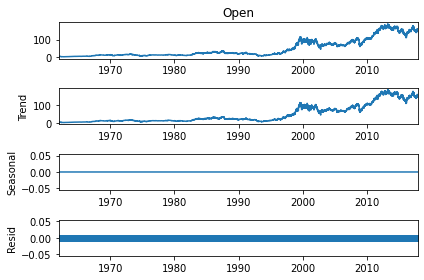

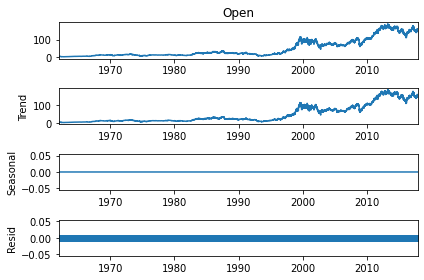

In [71]:
decomp.plot()

In [72]:
df1['open_lag_1'] = df1['Open'].shift(1)
df1['open_lag_2'] = df1['Open'].shift(2)
df1['open_lag_3'] = df1['Open'].shift(3)

In [73]:
df1.head()

,Open,High,Low,Close,Volume,OpenInt,open_lag_1,open_lag_2,open_lag_3
Date,,,,,,,,,
1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0,NaN,NaN,NaN
1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0,6.4130,NaN,NaN
1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0,6.3378,6.4130,NaN
1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0,6.3963,6.3378,6.4130
1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0,6.3211,6.3963,6.3378


In [74]:
df1.corr()

,Open,High,Low,Close,Volume,OpenInt,open_lag_1,open_lag_2,open_lag_3
Open,1.000000,0.999930,0.999926,0.999867,0.184323,NaN,0.999798,0.999614,0.999423
High,0.999930,1.000000,0.999889,0.999933,0.187304,NaN,0.999739,0.999554,0.999368
Low,0.999926,0.999889,1.000000,0.999930,0.181011,NaN,0.999714,0.999506,0.999306
Close,0.999867,0.999933,0.999930,1.000000,0.184243,NaN,0.999668,0.999468,0.999272
Volume,0.184323,0.187304,0.181011,0.184243,1.000000,NaN,0.185006,0.185363,0.185554
OpenInt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_lag_1,0.999798,0.999739,0.999714,0.999668,0.185006,NaN,1.000000,0.999798,0.999614
open_lag_2,0.999614,0.999554,0.999506,0.999468,0.185363,NaN,0.999798,1.000000,0.999798
open_lag_3,0.999423,0.999368,0.999306,0.999272,0.185554,NaN,0.999614,0.999798,1.000000


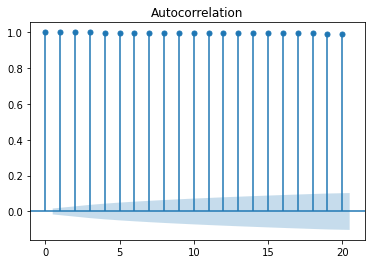

In [76]:
plot_acf(df1['Open'], lags = 20);

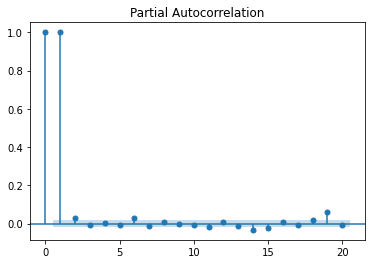

In [78]:
plot_pacf(df1['Open'], lags = 20);

In [80]:
df1['first_diff_open'] = df1['Open'].diff(1)
df1['second_diff_open'] = df1['Open'].diff(1).diff(1)

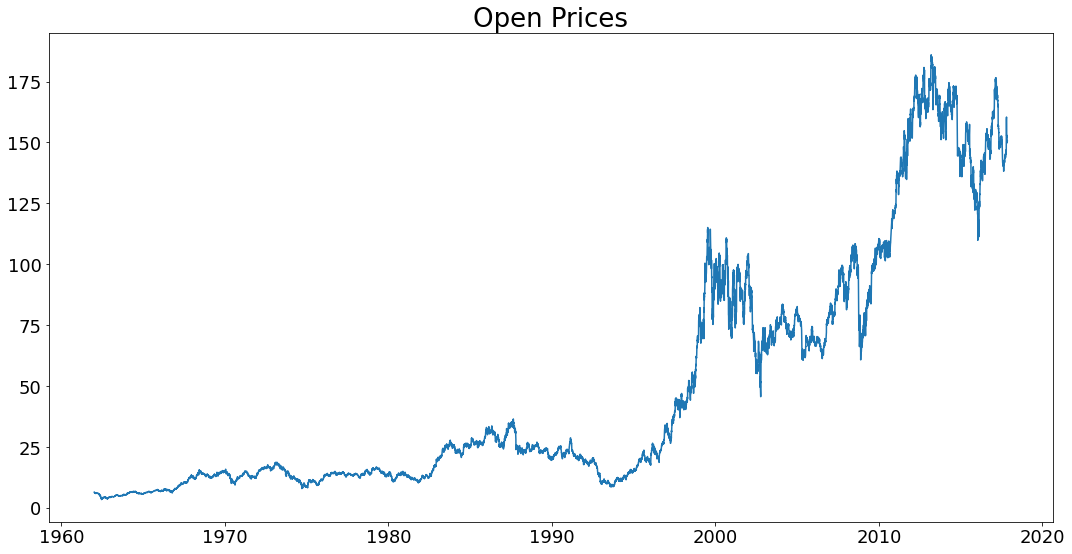

In [84]:
plot_series(df1, ['Open'], title = "Open Prices")

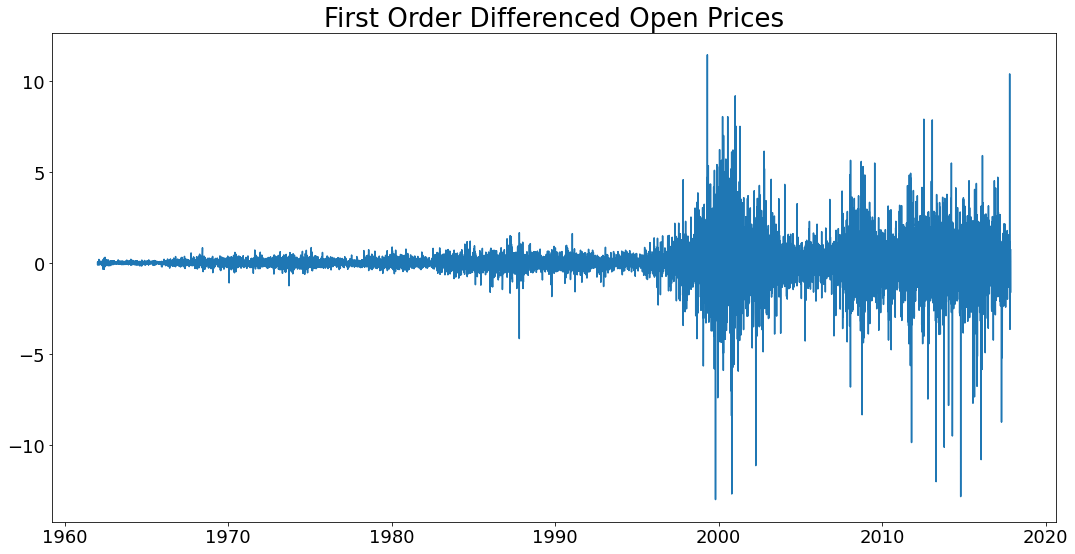

In [86]:
plot_series(df1, ['first_diff_open'], title = "First Order Differenced Open Prices")

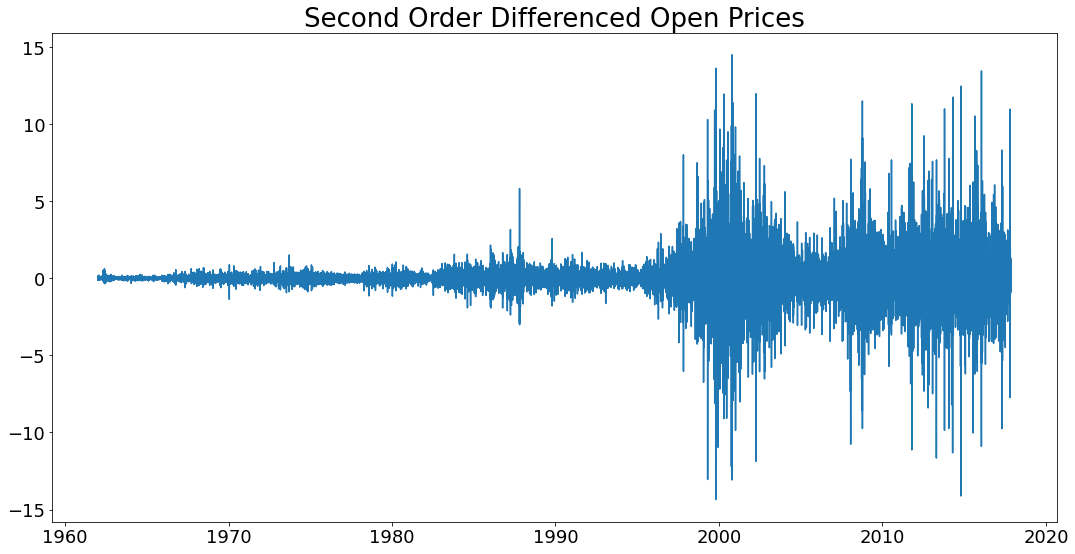

In [87]:
plot_series(df1, ['second_diff_open'], title = "Second Order Differenced Open Prices")

In [88]:
adfuller(df1['Open'])

(-0.24730512938557997,
 0.9326430259275116,
 41,
 14017,
 {'1%': -3.4308166118249357,
  '5%': -2.861746221178967,
  '10%': -2.5668797667403522},
 39380.09420205855)

In [90]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [91]:
interpret_dftest(adfuller(df1['Open']))

Test Statistic   -0.247305
p-value           0.932643
dtype: float64

In [93]:
interpret_dftest(adfuller(df1['first_diff_open'].dropna()))

Test Statistic   -19.065509
p-value            0.000000
dtype: float64

In [94]:
interpret_dftest(adfuller(df1['second_diff_open'].dropna()))

Test Statistic   -32.796715
p-value            0.000000
dtype: float64

In [98]:
y_train, y_test = train_test_split(df1['first_diff_open'],
                                   test_size = 0.1,
                                   shuffle = False) # Shuffle = False is IMPORTANT!

In [99]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 1, q) model.
            print(f'Attempting to fit ARIMA({p},1,{q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
                          order = (p,1,q)) # values of p, d, q
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0,1,0)
The AIC for ARIMA(0,1,0) is: 41820.904274783905
Attempting to fit ARIMA(0,1,1)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

The AIC for ARIMA(0,1,1) is: 32366.567635311705
Attempting to fit ARIMA(0,1,2)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


The AIC for ARIMA(0,1,2) is: 32328.71598660293
Attempting to fit ARIMA(0,1,3)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


The AIC for ARIMA(0,1,3) is: 32329.06125816446
Attempting to fit ARIMA(0,1,4)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


The AIC for ARIMA(0,1,4) is: 32331.058515354765
Attempting to fit ARIMA(1,1,0)
The AIC for ARIMA(1,1,0) is: 37606.76557525293
Attempting to fit ARIMA(1,1,1)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been pr

The AIC for ARIMA(1,1,1) is: 32327.68577525441
Attempting to fit ARIMA(1,1,2)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

The AIC for ARIMA(1,1,2) is: 32321.12091882452
Attempting to fit ARIMA(1,1,3)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        Futur

The AIC for ARIMA(1,1,3) is: 32314.91489764117
Attempting to fit ARIMA(1,1,4)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

The AIC for ARIMA(1,1,4) is: 32318.416676135308
Attempting to fit ARIMA(2,1,0)
The AIC for ARIMA(2,1,0) is: 36050.33424886871
Attempting to fit ARIMA(2,1,1)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace 

The AIC for ARIMA(2,1,1) is: 32328.465274658076
Attempting to fit ARIMA(2,1,2)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

The AIC for ARIMA(2,1,2) is: 32316.9174249284
Attempting to fit ARIMA(2,1,3)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        Futur

The AIC for ARIMA(2,1,3) is: 32337.51235769318
Attempting to fit ARIMA(2,1,4)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

The AIC for ARIMA(2,1,4) is: 32308.971203475183
Attempting to fit ARIMA(3,1,0)
The AIC for ARIMA(3,1,0) is: 35060.860571240104
Attempting to fit ARIMA(3,1,1)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace 

The AIC for ARIMA(3,1,1) is: 32330.396519969054
Attempting to fit ARIMA(3,1,2)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

The AIC for ARIMA(3,1,2) is: 32316.971679175374
Attempting to fit ARIMA(3,1,3)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

The AIC for ARIMA(3,1,3) is: 32304.138663410544
Attempting to fit ARIMA(3,1,4)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

The AIC for ARIMA(3,1,4) is: 32297.766827607862
Attempting to fit ARIMA(4,1,0)
The AIC for ARIMA(4,1,0) is: 34758.60984215074
Attempting to fit ARIMA(4,1,1)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmo

The AIC for ARIMA(4,1,1) is: 32325.330703030366
Attempting to fit ARIMA(4,1,2)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

The AIC for ARIMA(4,1,2) is: 32308.46318842545
Attempting to fit ARIMA(4,1,3)


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

The AIC for ARIMA(4,1,3) is: 32303.413396650623
Attempting to fit ARIMA(4,1,4)
The AIC for ARIMA(4,1,4) is: 32298.358738233957


MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(3,1,4).
This model has an AIC of 32297.766827607862.


/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        Futur

In [100]:
# No datetimeindex and therefore no frequency. How to fix?
model = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
              order = (3,1,4))

# Fit ARIMA model.
arima = model.fit()

# Generate predictions based on test set.
preds = model.predict(params = arima.params,
                      start = y_test.index[0],
                      end = y_test.index[-1])

# Plot data.
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(y_train.index, pd.DataFrame(y_train).diff(), color = 'blue')

# Plot testing data.
plt.plot(y_test.index, pd.DataFrame(y_test).diff(), color = 'orange')

# Plot predicted test values.
plt.plot(y_test.index, preds, color = 'green')

plt.title(label = 'Once-Differenced Global Mean Temperature with ARIMA(1, 1, 3) Predictions', fontsize=16)
plt.show();

/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace 

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'